# Principal component regression

Let's implement the PCR method using stock market data. We want to predict the one-month-ahead stock return using principal components extracted from a set of 67 stock characteristics

In [11]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint
import seaborn as sns; sns.set()

# load data
data = pd.read_csv('stock_data.csv',index_col=0)
y = data['RET']
X = data.drop('RET',axis=1)

print(data.shape)
data.head()

(3481, 67)


,RET,CAPEI,bm,evm,pe_op_basic,pe_exi,pe_inc,ps,pcf,dpr,...,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb
1,-0.088191,0.759381,-0.999558,0.696751,0.079703,0.007577,-0.021611,-0.992676,0.147590,-0.956408,...,-0.998073,-0.932030,-0.870970,-0.987193,0.648937,-0.999998,-0.998952,-1.0,0.551959,-0.910672
2,0.079484,0.757554,-0.999718,0.700319,-0.130809,-0.176777,-0.208520,-0.998950,-0.447588,-0.958060,...,-0.973573,-0.932865,-0.801126,-0.926463,0.649039,-1.000000,-0.995808,-1.0,0.549097,-0.916289
3,-0.015975,0.758821,-0.999205,0.696543,0.022296,-0.046242,-0.076176,-0.997872,0.103177,-0.959754,...,-0.998721,-0.936796,-0.863408,-0.980141,0.648930,-1.000000,-1.000000,-1.0,0.550775,-0.956189
4,0.051836,0.758721,-0.999590,0.696393,0.027334,-0.041370,-0.071237,-0.994922,0.107730,-0.952962,...,-0.998041,-0.928855,-0.869320,-0.984026,0.648950,-1.000000,-0.996647,-1.0,0.552304,-0.916565
5,0.095178,0.758717,-0.999612,0.696722,0.027037,-0.039758,-0.069602,-0.985473,0.108669,-0.957310,...,-0.998229,-0.931362,-0.882201,-0.994100,0.648897,-0.999702,-0.999371,-1.0,0.551169,-0.918346


## Run PCA

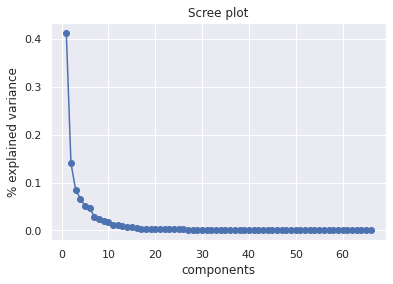

In [30]:
pca = PCA()
pca.fit(X)

# Scree plot
plt.plot(range(1,len(pca.components_)+1),pca.explained_variance_ratio_,'-o')
plt.xlabel('components')
plt.ylabel('% explained variance')
plt.title("Scree plot")
plt.show()

Percentage of explained variance

In [31]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


array([ 41.28,  55.32,  63.79,  70.45,  75.55,  80.17,  83.06,  85.52,
        87.47,  89.29,  90.35,  91.4 ,  92.25,  92.94,  93.58,  94.  ,
        94.38,  94.75,  95.1 ,  95.44,  95.75,  96.  ,  96.24,  96.47,
        96.69,  96.88,  97.05,  97.21,  97.36,  97.51,  97.66,  97.8 ,
        97.93,  98.05,  98.17,  98.29,  98.41,  98.52,  98.62,  98.72,
        98.82,  98.92,  99.02,  99.11,  99.2 ,  99.29,  99.38,  99.46,
        99.54,  99.61,  99.68,  99.75,  99.81,  99.86,  99.9 ,  99.94,
        99.98, 100.01, 100.03, 100.04, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05])

Plot PCA coefficients (loadings) for the first 3 components.

Each point corresponds to loadings of one of the 66 variables

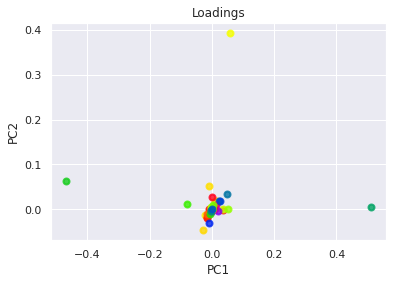

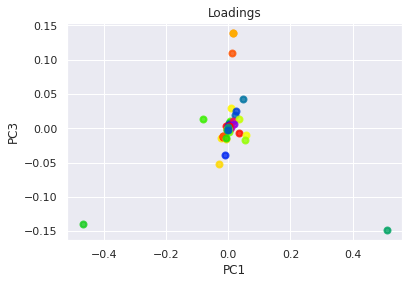

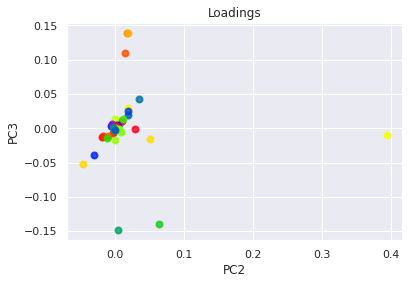

In [52]:
for i in range(0,len(pca.components_[0])):
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    plt.scatter(pca_0_loadings, pca_1_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()    

for i in range(0,len(pca.components_[0])):
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_0_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

for i in range(0,len(pca.components_[0])):
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_1_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

## Run PCR

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Extract principal components
pca = PCA()
X_reduced = pca.fit_transform(X_train)

In [ ]:
#define cross validation method
cv = KFold(5)

regr = LinearRegression()
mse = []

# MSE score
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Cross-validation MSE')


In [ ]:
#training and testing data
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))